[View in Colaboratory](https://colab.research.google.com/github/aksh98/FintechProject/blob/master/NowCastingData_Regression.ipynb)

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
!pip install -U -q PyDrive


In [0]:
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
creds = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)




In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving GoogleTrendsData.csv to GoogleTrendsData.csv
User uploaded file "GoogleTrendsData.csv" with length 4934 bytes


In [7]:
!ls
!cd sample_data/

adc.json  datalab  GoogleTrendsData.csv  sample_data


In [12]:
%cd ..
!ls

/content
adc.json  datalab  GoogleTrendsData.csv  sample_data


In [54]:
datafile = pd.read_csv('GoogleTrendsData.csv')
datafile.shape

(176, 8)

In [55]:
# datafile.shape[0]
datafile.tail()

,Month,Employment,Unemployment,Productivity,GDP,Stock market,jobs,UMEX
171,2018-04,74,18,1,4,13,68,127.0
172,2018-05,71,16,1,4,9,68,134.0
173,2018-06,71,17,1,3,9,71,132.0
174,2018-07,71,18,1,5,9,71,NaN
175,2018-08,85,16,1,5,11,81,NaN


In [0]:
# print(datafile['UMEX'].max())
# print(datafile['UMEX'].min())

datafile.drop(datafile.tail(2).index,inplace=True)

In [57]:
datafile.tail()

,Month,Employment,Unemployment,Productivity,GDP,Stock market,jobs,UMEX
169,2018-02,72,20,1,5,27,63,136.0
170,2018-03,71,17,1,4,15,64,134.0
171,2018-04,74,18,1,4,13,68,127.0
172,2018-05,71,16,1,4,9,68,134.0
173,2018-06,71,17,1,3,9,71,132.0


In [0]:
Y = datafile['UMEX']
X = datafile[['Employment','Unemployment','Productivity','Stock market','GDP','jobs']]

In [117]:
X.head()
print(X.shape)

(174, 5)


In [118]:
Y.tail()
# Y.shape 

169    136.0
170    134.0
171    127.0
172    134.0
173    132.0
Name: UMEX, dtype: float64

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20)

test_Data   predicted
123.0  -> 119.02  - 125.12
115.0  -> 119.02  - 119.76
79.0  -> 19.33  - 56.37
70.0  -> 88.56  - 78.03
111.0  -> 88.67  - 93.00
7.0  -> 63.06  - 42.82
92.0  -> 88.67  - 94.00
73.0  -> 19.33  - 69.96
60.0  -> 19.33  - 68.00
121.0  -> 88.56  - 106.80
90.0  -> 88.67  - 93.09
63.0  -> 88.67  - 94.12
45.0  -> 63.06  - 54.42
133.0  -> 119.02  - 122.00
95.0  -> 63.06  - 63.00
96.0  -> 88.56  - 95.90
21.0  -> 63.06  - 63.48
83.0  -> 88.56  - 79.54
94.0  -> 63.06  - 77.51
117.0  -> 88.56  - 106.44
11.0  -> 88.56  - 73.04
129.0  -> 119.02  - 121.71
108.0  -> 119.02  - 98.16
114.0  -> 119.02  - 123.26
114.0  -> 119.02  - 127.31
53.0  -> 92.43  - 97.33
126.0  -> 119.02  - 106.65
101.0  -> 88.67  - 94.00
97.0  -> 88.67  - 93.09
104.0  -> 119.02  - 99.63
116.0  -> 119.02  - 122.48
109.0  -> 119.02  - 122.15
97.0  -> 92.43  - 87.88
133.0  -> 119.02  - 114.43
84.0  -> 88.67  - 93.33


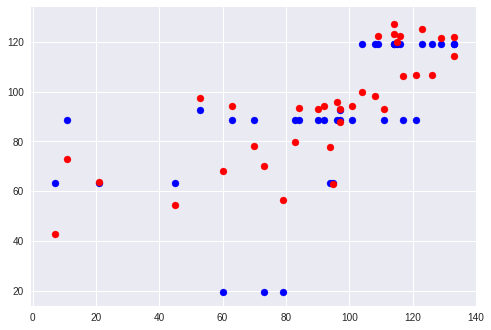

In [160]:

rng = np.random.RandomState(1)

# reg = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
reg = DecisionTreeRegressor(max_depth=3)
# regr_2 = AdaBoostRegressor(SVR(kernel= 'rbf', C= 1e3, gamma= 0.1),
#                           n_estimators=300, random_state=rng)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                          n_estimators=300, random_state=rng)

# reg = LinearRegression()
# reg = SVR(kernel='rbf',)
reg.fit(X_train,Y_train)
regr_2.fit(X_train,Y_train)

arr = reg.predict(X_test)
arr2 = regr_2.predict(X_test)


# print(reg.coef_)
# print(reg.intercept_)


# tsne = TSNE(n_components=2).fit_transform(X)
# print("tsne shape - ",tsne.shape)
# plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
# plt.title('Testing Data')
# plt.xticks(())
# plt.yticks(())
# plt.plot(test,reg.predict(X_test),color = 'red',linewidth=3)
# plt.show()


test = np.asarray(Y_test) # to print


print("test_Data","  predicted")

for i in range(0,len(Y_test)):
  print(test[i]," -> %.2f"%arr[i]," - %.2f"%arr2[i])

plt.scatter(test,arr,color='blue')
plt.scatter(test,arr2,color='red')
plt.show()

[-1.50861042 -0.94813394  0.69087487 -1.6366327   0.99295168  0.71399944]
204.0330738506069
tsne shape -  (174, 2)


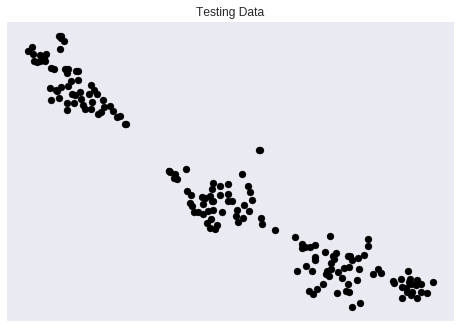

123.0  -> 121.43
115.0  -> 125.03
79.0  -> 82.40
70.0  -> 100.73
111.0  -> 94.62
7.0  -> 51.41
92.0  -> 91.40
73.0  -> 84.78
60.0  -> 62.47
121.0  -> 78.00
90.0  -> 97.58
63.0  -> 99.53
45.0  -> 59.94
133.0  -> 110.29
95.0  -> 45.77
96.0  -> 88.57
21.0  -> 68.98
83.0  -> 97.60
94.0  -> 92.97
117.0  -> 76.66
11.0  -> 102.25
129.0  -> 125.89
108.0  -> 96.11
114.0  -> 106.53
114.0  -> 112.18
53.0  -> 108.68
126.0  -> 106.70
101.0  -> 88.96
97.0  -> 81.30
104.0  -> 96.39
116.0  -> 116.32
109.0  -> 123.13
97.0  -> 99.27
133.0  -> 99.04
84.0  -> 103.26


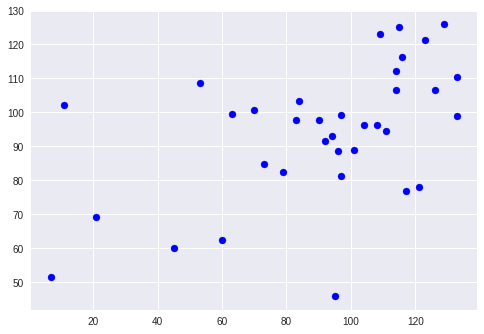

In [155]:
regr = linear_model.BayesianRidge()
regr.fit(X_train,Y_train)
print(regr.coef_)
print(regr.intercept_)

tsne = TSNE(n_components=2).fit_transform(X)
print("tsne shape - ",tsne.shape)

plt.scatter(tsne[:,0],tsne[:,1],color = 'black')
plt.title('Testing Data')
plt.xticks(())
plt.yticks(())
# plt.plot(Y_test,reg.predict(X_test),color = 'red',linewidth=3)
plt.show()

test = np.asarray(Y_test)
arr = regr.predict(X_test)
for i in range(0,len(Y_test)):
  print(test[i]," -> %.2f"%arr[i])
  
plt.scatter(test,arr,color='blue')
plt.show()